In [220]:
import pandas as pd

# Load JSON data into a DataFrame
df = pd.read_json('merged_sorted_intersections.json')

FEATURE ENGINEERING AND EXRTACTION

In [221]:
# Convert timestamps to datetime if they aren't already
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

# Extract components
df['hour'] = df['timeStamp'].dt.hour
df['minute'] = df['timeStamp'].dt.minute
df['second'] = df['timeStamp'].dt.second


In [222]:
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['part_of_day'] = df['hour'].apply(categorize_time_of_day)


In [223]:
df['car_count_diff'] = df['num_cars'].diff()


In [224]:
df['ema_cars'] = df['num_cars'].ewm(span=10, adjust=False).mean()


In [225]:
df['weekday'] = df['timeStamp'].dt.weekday
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)


In [226]:
# # Assuming you have a list or set of public holidays
# public_holidays = set(['2022-01-01', '2022-12-25'])  # example dates
# df['is_public_holiday'] = df['timestamp'].dt.date.astype(str).isin(public_holidays).astype(int)


In [227]:
df.head(40)

,trafficID,num_cars,weatherStamp:,timeStamp,dateStamp,greenTime,hour,minute,second,part_of_day,car_count_diff,ema_cars,weekday,is_weekend
0,A1,82,30,2024-07-29 10:16:15,2024-07-29,41,10,16,15,Morning,NaN,82.000000,0,0
1,B1,33,30,2024-07-29 10:16:15,2024-07-29,17,10,16,15,Morning,-49.0,73.090909,0,0
2,C1,71,30,2024-07-29 10:16:15,2024-07-29,36,10,16,15,Morning,38.0,72.710744,0,0
3,D1,73,30,2024-07-29 10:16:15,2024-07-29,37,10,16,15,Morning,2.0,72.763336,0,0
4,B2,157,30,2024-07-29 10:16:35,2024-07-29,50,10,16,35,Morning,84.0,88.079093,0,0
5,C2,12,30,2024-07-29 10:16:53,2024-07-29,6,10,16,53,Morning,-145.0,74.246531,0,0
6,D2,50,30,2024-07-29 10:16:55,2024-07-29,32,10,16,55,Morning,38.0,69.838070,0,0
7,A2,45,30,2024-07-29 10:16:59,2024-07-29,23,10,16,59,Morning,-5.0,65.322058,0,0
8,C3,46,30,2024-07-29 10:17:02,2024-07-29,23,10,17,2,Morning,1.0,61.808956,0,0
9,A3,89,30,2024-07-29 10:17:24,2024-07-29,46,10,17,24,Morning,43.0,66.752782,0,0


In [228]:
import numpy as np

# Weekly cycle (assuming data in hours and full weeks)
period = 7 * 24  # 7 days * 24 hours
df['sin_time'] = np.sin(2 * np.pi * df['timeStamp'].dt.hour / period)
df['cos_time'] = np.cos(2 * np.pi * df['timeStamp'].dt.hour / period)


In [229]:
len(df)

333

In [230]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [231]:
# Define your feature columns and target column
feature_cols = ['num_cars', 'sin_time', 'cos_time', 'is_weekend', 'ema_cars', 'car_count_diff']
target_col = 'greenTime'  # This should be the duration of green light or similar


In [232]:
# Check for NaN values across the DataFrame
print(df.isna().sum())

# If NaNs are present, decide on a filling strategy
df.fillna(method='ffill', inplace=True)  # Forward fill
df.fillna(method='bfill', inplace=True)  # Backward fill if forward fill doesn't apply to first rows


trafficID         0
num_cars          0
weatherStamp:     0
timeStamp         0
dateStamp         0
greenTime         0
hour              0
minute            0
second            0
part_of_day       0
car_count_diff    1
ema_cars          0
weekday           0
is_weekend        0
sin_time          0
cos_time          0
dtype: int64


C:\Users\omars\AppData\Local\Temp\ipykernel_21704\1555590152.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill
C:\Users\omars\AppData\Local\Temp\ipykernel_21704\1555590152.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward fill if forward fill doesn't apply to first rows


In [233]:
# Split the data into features and target
X = df[feature_cols]
y = df[target_col]


In [234]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define X and y
X = df[feature_cols].values
y = df[target_col].values

# Reshape X for LSTM [samples, time steps, features]
X = X.reshape((X.shape[0], 1, X.shape[1]))

In [235]:
# Split the data into training and testing sets chronologically
split_idx = int(len(X) * 0.8)  # 80% for training
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]


In [236]:
# Assuming 'scaler' is a StandardScaler instance
print('Feature means:', scaler.mean_)
print('Feature scales:', scaler.scale_)

# Check the maximum and minimum values of the scaled features
print('Max scaled features:', np.max(X_train, axis=0))
print('Min scaled features:', np.min(X_train, axis=0))


Feature means: [70.72372372  0.37519792  0.92679089  0.         71.12262799 -0.39339339]
Feature scales: [4.04559072e+01 1.56015113e-02 6.46235755e-03 1.00000000e+00
 1.20418145e+01 5.79006466e+01]
Max scaled features: [[190.           0.39989202   0.93087375   0.         106.42117303
  131.        ]]
Min scaled features: [[   0.            0.36534102    0.91656226    0.           43.77502754
  -146.        ]]


In [237]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.initializers import GlorotUniform

model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])


# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


c:\Users\omars\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [238]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 1898.9177 - mae: 41.6741 - val_loss: 1817.3811 - val_mae: 40.2986
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1841.8469 - mae: 40.9160 - val_loss: 1781.7035 - val_mae: 39.8615
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1810.0195 - mae: 40.6186 - val_loss: 1748.5134 - val_mae: 39.4474
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1772.5835 - mae: 40.1903 - val_loss: 1713.4254 - val_mae: 39.0005
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1782.4973 - mae: 40.3046 - val_loss: 1674.4899 - val_mae: 38.4922
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1690.5167 - mae: 39.1883 - val_loss: 1630.1091 - val_mae: 37.8993
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1691.1534 - mae: 39.1795 - val_loss: 1582.6558 - val_mae: 37.2489
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1635.1348 - mae: 38.3366 - val_loss: 1527.1627 - val_mae: 36.5251
Epoch 9/100
9/9

In [239]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 253.8624 - mae: 15.1298  
Test Loss: 249.70335388183594, Test MAE: 14.88538646697998


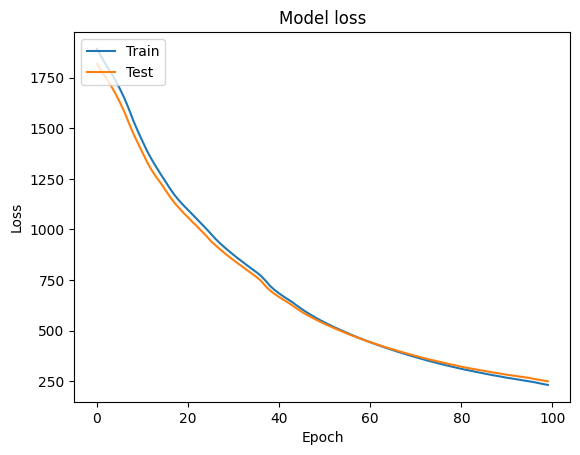

In [240]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
